Este colab fue desarrollado por Arnold Charry Armero

# Carrington Oil

Carrington Oil produce dos tipos de gasolina, gas 1
y gas 2, de dos tipos de crudo, crudo 1 y crudo
2 . Se permite que el gas 1 contenga hasta un 4% de impurezas y el gas
2 se permite contener hasta un 3% de impurezas. El gas 1 se vende por
8 dólares por barril, mientras que el gas 2 se vende a 12 dólares por barril. Hasta
4.200 barriles de gasolina 1 y hasta 4.300 barriles de gasolina 2 lata
ser vendido. El costo por barril de cada crudo, su disponibilidad y
El nivel de impurezas en cada crudo se muestra en la tabla
31 . Antes de mezclar el petróleo crudo con gas, cualquier cantidad de
cada crudo se puede “purificar” a un costo de 0,50 dólares por barril.
La purificación elimina la mitad de las impurezas del petróleo crudo.
Determine cómo maximizar las ganancias.

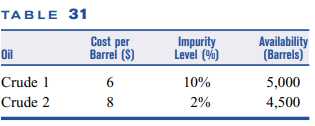

##Conjuntos

$ i = \text{Crudo indexado por } i$

$ j = \text{Gas indexado por } j$

## Parámetros

$I_{ij} = \textrm{Ingresos de vender el gas impuro } j \textrm{ utilizando el crudo } i$

$IU_{ij} = \textrm{Ingresos de vender el gas puro } j \textrm{ utilizando el crudo } i$

$C_{ij} = \textrm{Costo de producir el gas impuro } j \textrm{ utilizando el crudo } i$

$CU_{ij} = \textrm{Costo de producir el gas puro } j \textrm{ utilizando el crudo } i$

$ M_{j} = \textrm{Cantidad máxima de barriles que se pueden vender } j$

$IM_{ij} = \textrm{Impurezas de gas impuro } j \textrm{ utilizando el crudo } i$

$IMM_{ij} = \textrm{Impurezas de gas puro } j \textrm{ utilizando el crudo } i$

$ MI_{j} = \textrm{Máxima cantidad de impurezas } j $


## Variables de decisión

$ x_{ij} = \textrm{Cantidad producida de gas impuro }j \textrm{ con el crudo }i$

$ y_{ij} = \textrm{Cantidad producida de gas puro }j \textrm{ con el crudo }i$


## Función Objetivo

$$ \textrm{Max } z = \sum_{j = 1}^{n} \sum_{i = 1}^{n} I_{ij}\: x_{ij} + \sum_{j = 1}^{n} \sum_{i = 1}^{n} IU_{ij}\: y_{ij} - \sum_{j = 1}^{n} \sum_{i = 1}^{n} C_{ij}\: x_{ij} - \sum_{j = 1}^{n} \sum_{i = 1}^{n} CU_{ij}\: y_{ij}$$

## Restricciones

Se tiene un máximo de barriles de gas,

$$ \sum_{i = 1}^{n} x_{ij} + \sum_{i = 1}^{n} y_{ij} \leq M_{j}, \forall j $$

Los barriles de gas deben tener un máximo de impurezas,

$$ \sum_{i = 1}^{n} x_{ij} IM_{ij} + \sum_{i = 1}^{n} y_{ij} IMM_{ij}  \leq MI_{j} (\sum_{i = 1}^{n} x_{ij} + \sum_{i = 1}^{n} y_{ij}),  \forall j  $$


In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 16.9 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [3]:
#Conjuntos
crudo = range(2)
gas = range(2)

In [33]:
#Parámetros

I = [[8, 12], [8, 12]]

IU = [[8, 12], [8, 12]]

C = [[6, 6], [8, 8]]

CU = [[6.5, 6.5], [8.5, 8.5]]

M = [4200, 4300]

IM = [[0.1, 0.1], [0.02, 0.02]]

IMM = [[0.05, 0.05], [0.01, 0.01]]

MI = [0.04, 0.03]

In [34]:
# Crear la instancia del modelo
model = LpProblem(name="Carrington_Oil", sense=LpMaximize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (crudo, gas), 0, None, LpContinuous)
Y = LpVariable.dicts("Y", (crudo, gas), 0, None, LpContinuous)

# Agregar la función objetivo
model += (lpSum([[I[i][j] * X[i][j] for i in crudo] for j in gas]) + lpSum([[IU[i][j] * Y[i][j] for i in crudo] for j in gas]) - lpSum([[C[i][j] * X[i][j] for i in crudo] for j in gas]) - lpSum([[CU[i][j] * Y[i][j] for i in crudo] for j in gas]))

# Agregar las restricciones

for j in gas:
  model += lpSum([X[i][j] for i in crudo]) + lpSum([Y[i][j] for i in crudo ]) <= M[j]

for j in gas:
  model += lpSum([X[i][j] * IM[i][j] for i in crudo]) + lpSum([Y[i][j] * IMM[i][j] for i in crudo]) <= MI[j] * (lpSum([X[i][j] for i in crudo]) + lpSum([Y[i][j] for i in crudo]))

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Utilidades totales = $", value(model.objective))

Status: Optimal
X_0_0 = 0.0
X_0_1 = 0.0
X_1_0 = 1400.0
X_1_1 = 0.0
Y_0_0 = 2800.0
Y_0_1 = 2150.0
Y_1_0 = 0.0
Y_1_1 = 2150.0
Utilidades totales = $ 23550.0
